# <p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:10px 10px;"><b>Logistic Regression (Best Treshold) </b></p>


# Exploratory Data Analysis

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.options.display.float_format = '{:.3f}'.format

This dataset contains data obtained from diabetes studies conducted on Pima Indian women living in Arizona.

Dataset Link
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
The dataset includes the following features:

Pregnancies: Number of pregnancies.<br>
Glucose: Plasma glucose concentration in an oral glucose tolerance test (2-hour value).<br>
Blood Pressure: Blood pressure (mm Hg).<br>
Skin Thickness: Triceps skin fold thickness (mm).<br>
Insulin: 2-hour serum insulin (mu U/ml).<br>
BMI: Body mass index (weight in kg/(height in m)^2).<br>
Diabetes Pedigree Function: A function that estimates the likelihood of diabetes based on family history.<br>
Age: Age (years).<br>
Outcome: Class label (0 or 1), indicating whether a person has diabetes. 1 means the person has diabetes, while 0 means they do not.<br>
This dataset is widely used for training machine learning algorithms and solving binary classification problems such as predicting diabetes. It is particularly useful for tasks such as data preprocessing, feature engineering, and comparing classification algorithm performances.

Typical applications of the dataset include understanding which patient profiles are at risk of diabetes, identifying features that increase the likelihood of diabetes, and developing predictive models to aid in the automatic diagnosis of diabetes.

It is important to note that the dataset may present challenges, such as missing values in some features or an imbalanced class distribution. These challenges provide opportunities to explore deeper machine learning topics, including data cleaning, missing data imputation, handling imbalanced datasets, and model validation techniques.

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [ ]:
# One of the most common problems in classification problems is inbalanced data. 
# Since a class with a small number of observations naturally has a small number of observations, the learning that the model can do from these observations is usually weaker than in a class with a large number of observations, and the scores of the relevant class may be lower.

# We will go into the details of the operations that can be done to correct/balance the scores of the fewer classes below.

# IMPORTANT NOTE: not all data that is inbalanced will have bad scores for the underclass. 
# In some data, the scores of low classes can be very good.
# Although the data is small, even small data may be sufficient for training because it defines the class very well.
# In these cases, there is no need to correct/balance the scores of the lesser class.


Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
df.Outcome.value_counts(normalize = True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

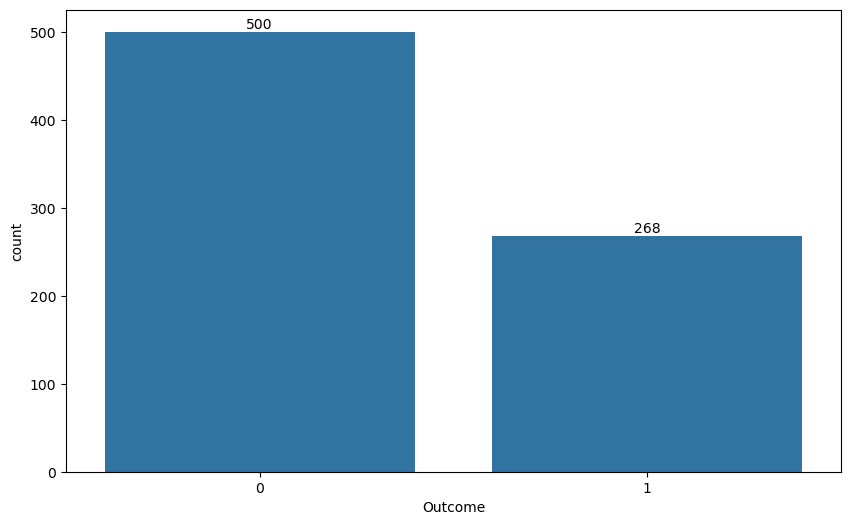

In [13]:
ax = sns.countplot(x='Outcome', data=df)
ax.bar_label(ax.containers[0]);

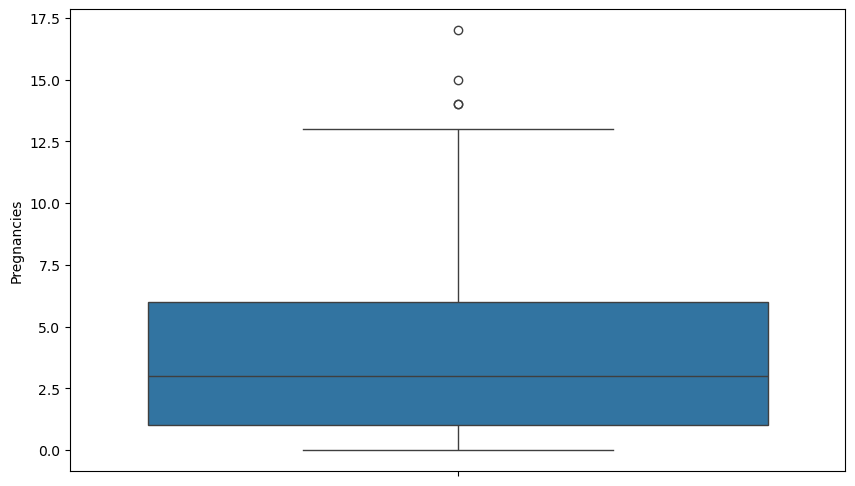

In [14]:
sns.boxplot(df.Pregnancies);

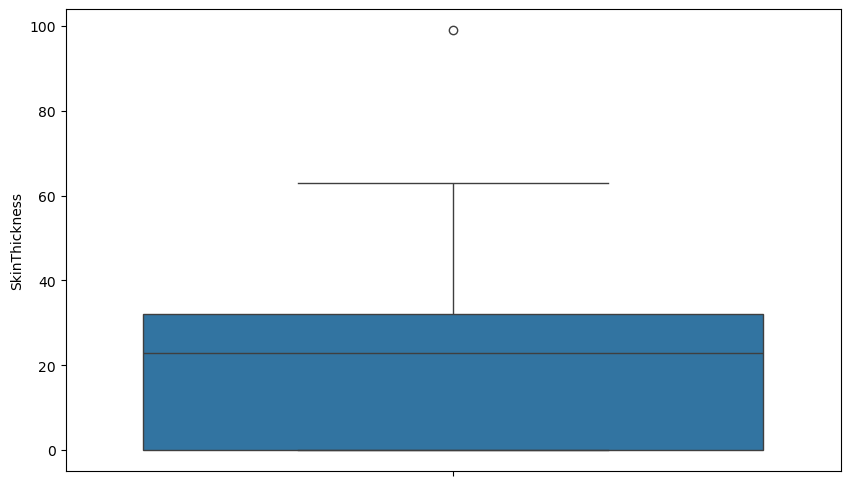

In [15]:
sns.boxplot(df.SkinThickness);

In [16]:
df = df[df.SkinThickness<70]

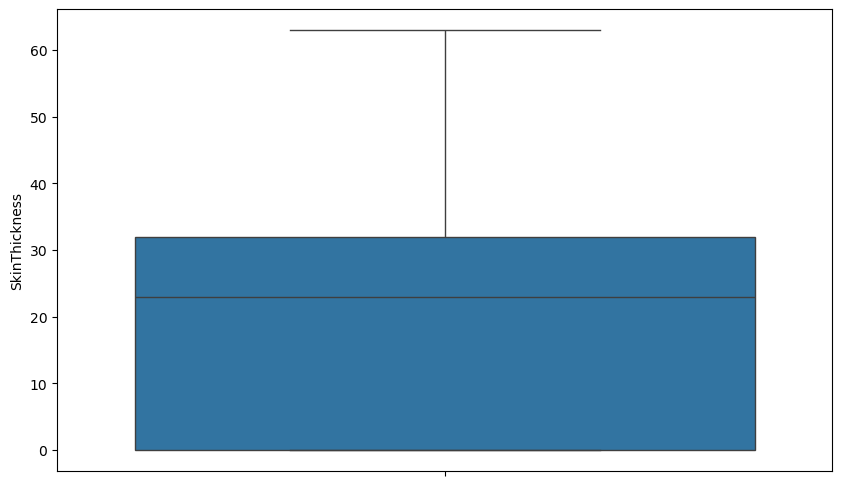

In [17]:
sns.boxplot(df.SkinThickness);

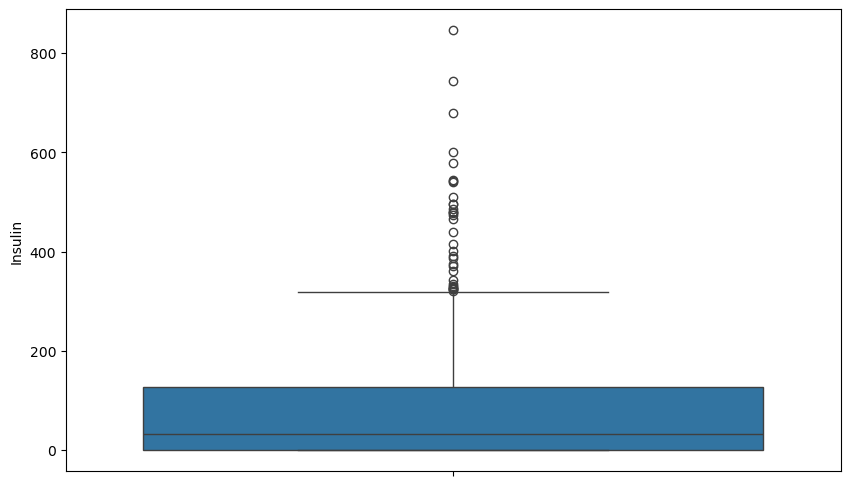

In [18]:
sns.boxplot(df.Insulin);

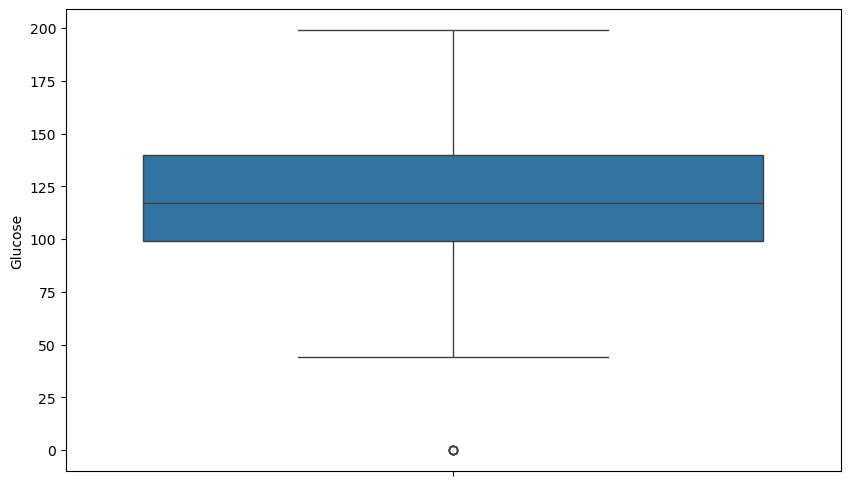

In [19]:
sns.boxplot(df.Glucose);

In [20]:
df = df[df.Glucose>0]

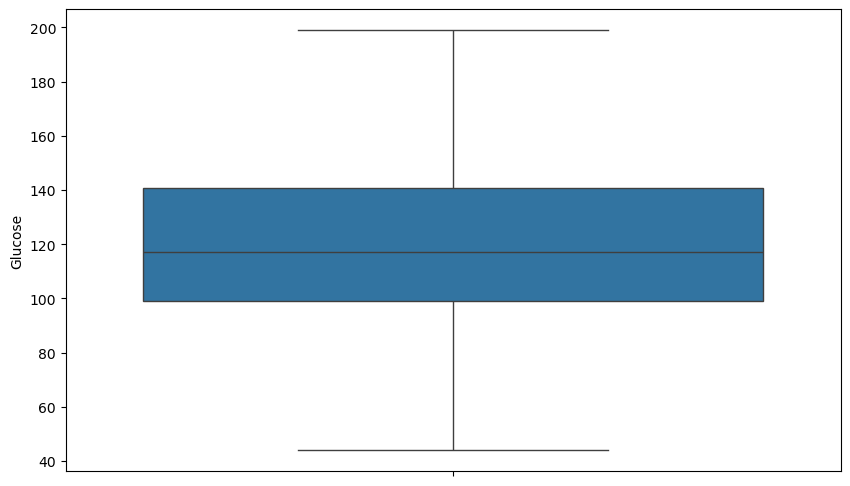

In [21]:
sns.boxplot(df.Glucose);

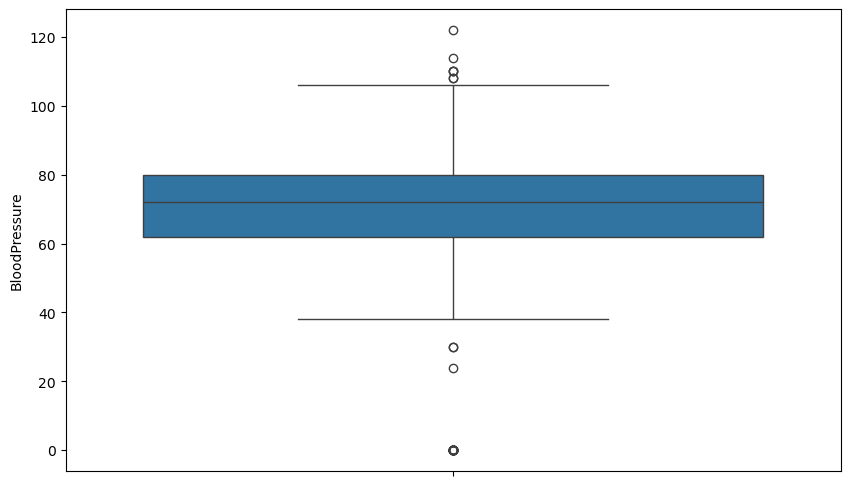

In [22]:
sns.boxplot(df.BloodPressure);

In [23]:
df = df[df.BloodPressure>35]

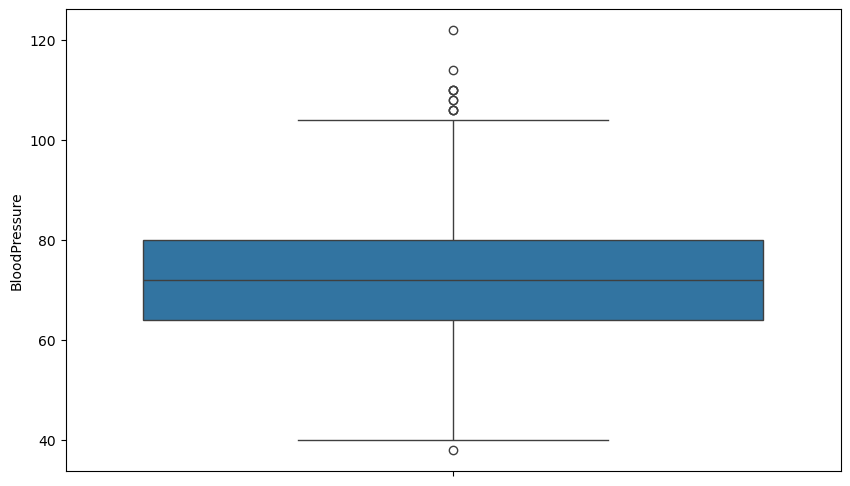

In [24]:
sns.boxplot(df.BloodPressure);

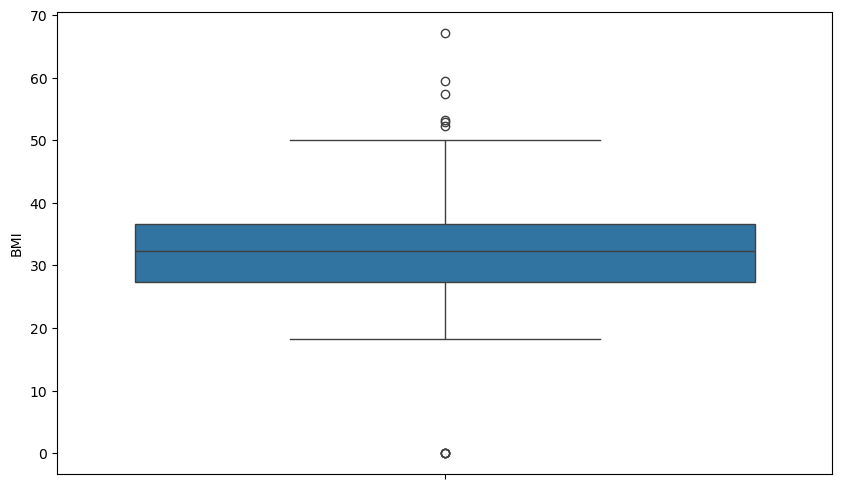

In [25]:
sns.boxplot(df.BMI);

In [26]:
df = df[df.BMI>0]

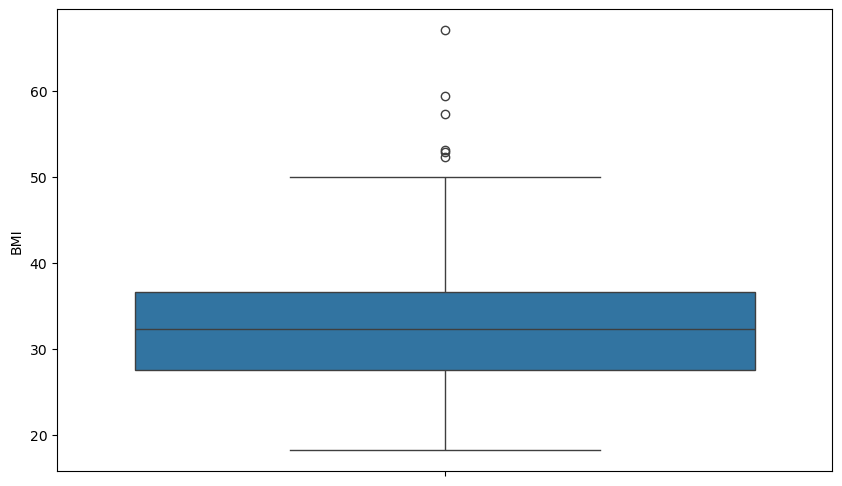

In [27]:
sns.boxplot(df.BMI);

In [28]:
df.shape  

(720, 9)

In [29]:
df.Outcome.value_counts() 

Outcome
0    473
1    247
Name: count, dtype: int64

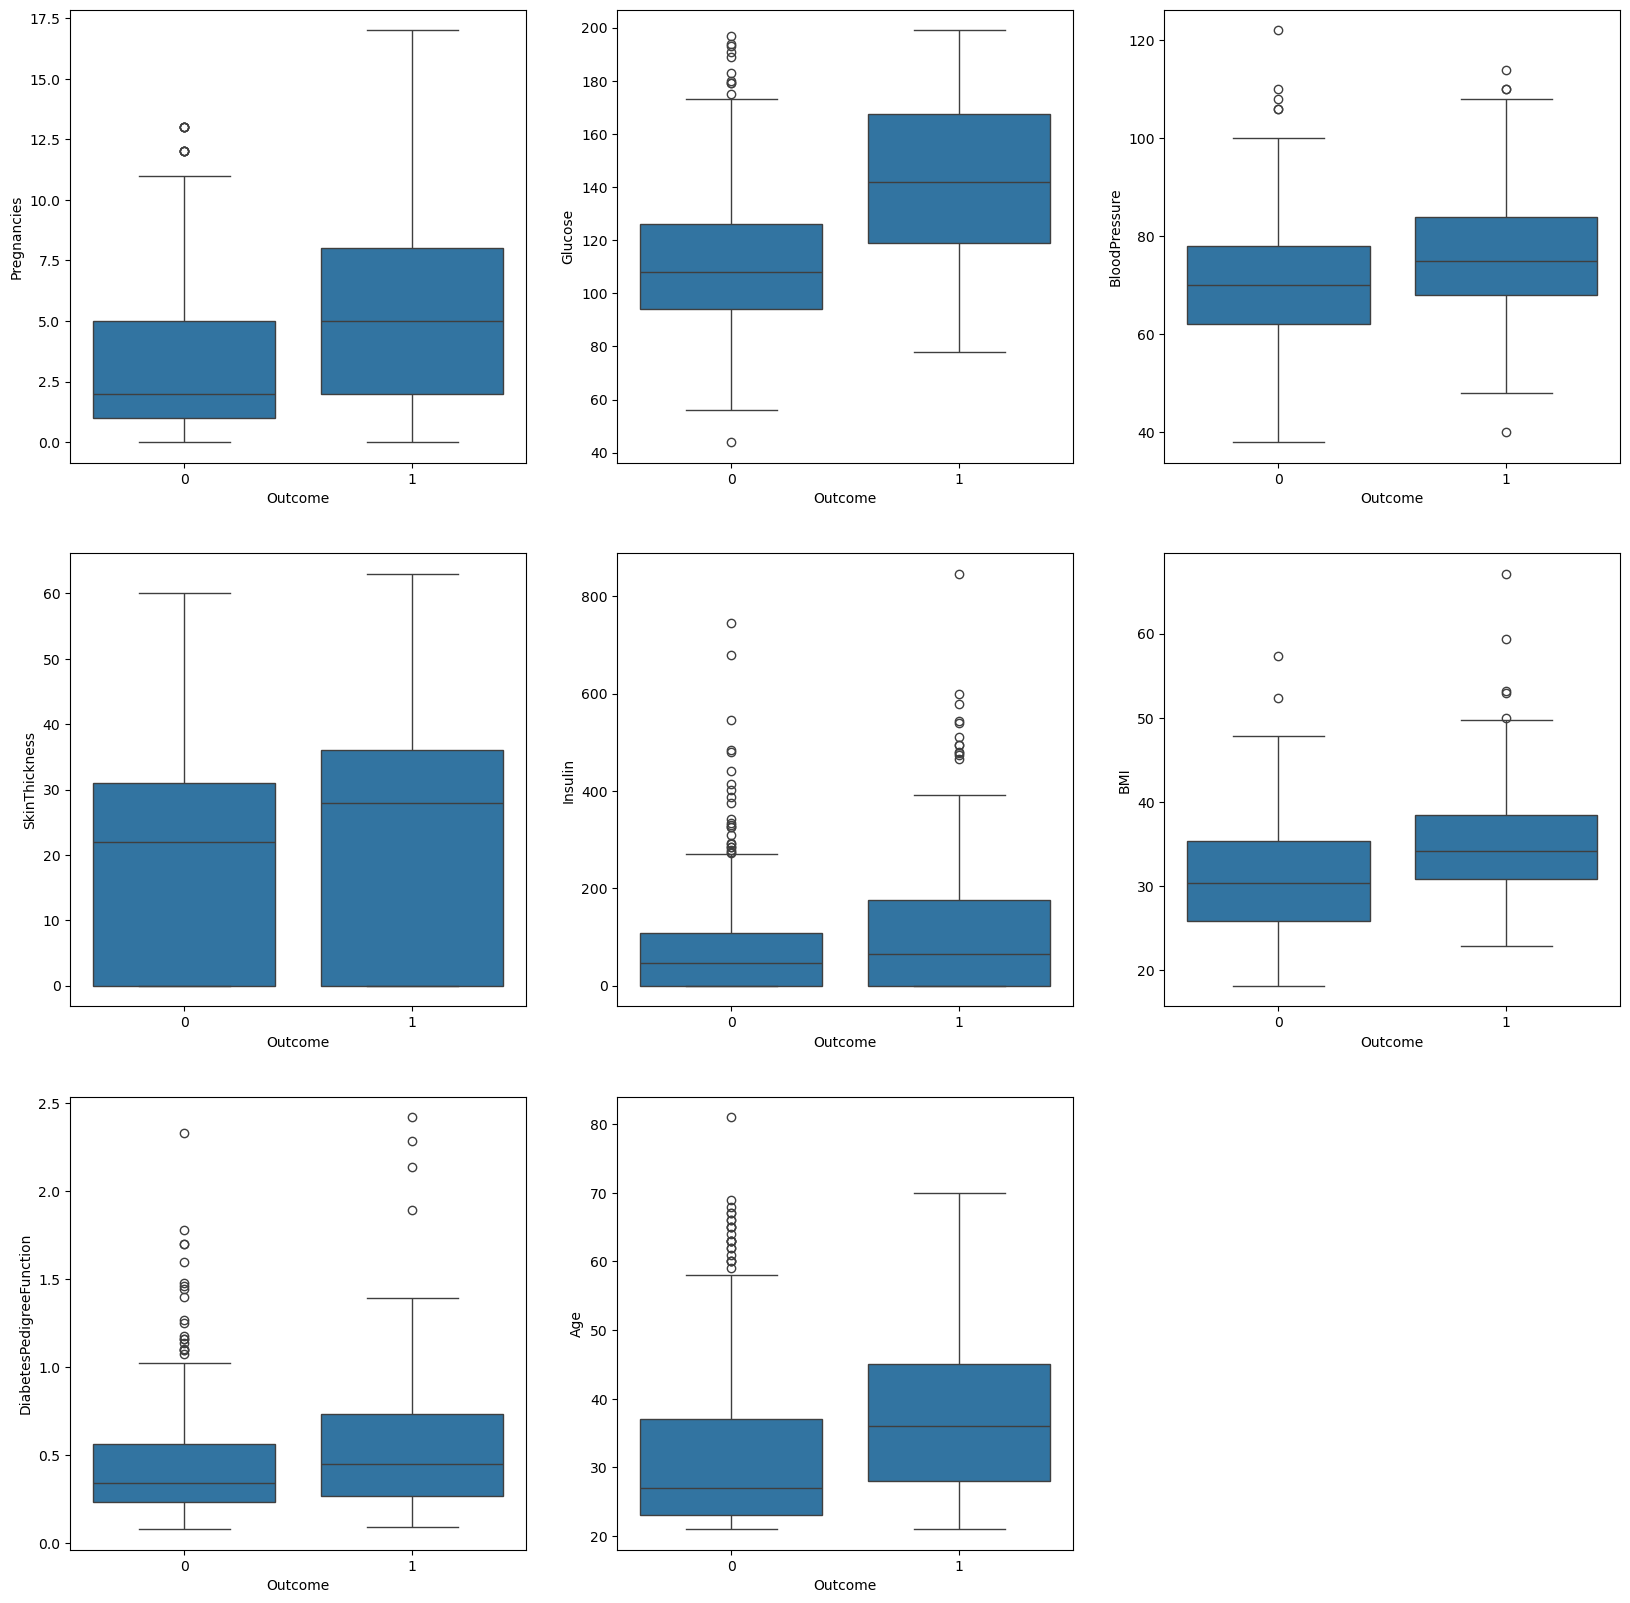

In [30]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

In [31]:
import plotly.express as px
plt.figure(figsize=(10,8))

fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

<Figure size 1000x800 with 0 Axes>

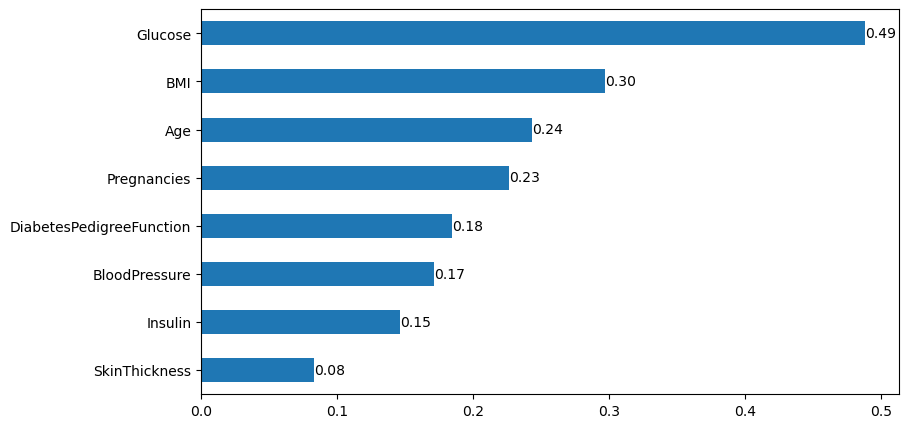

In [32]:
plt.figure(figsize=(9,5))
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

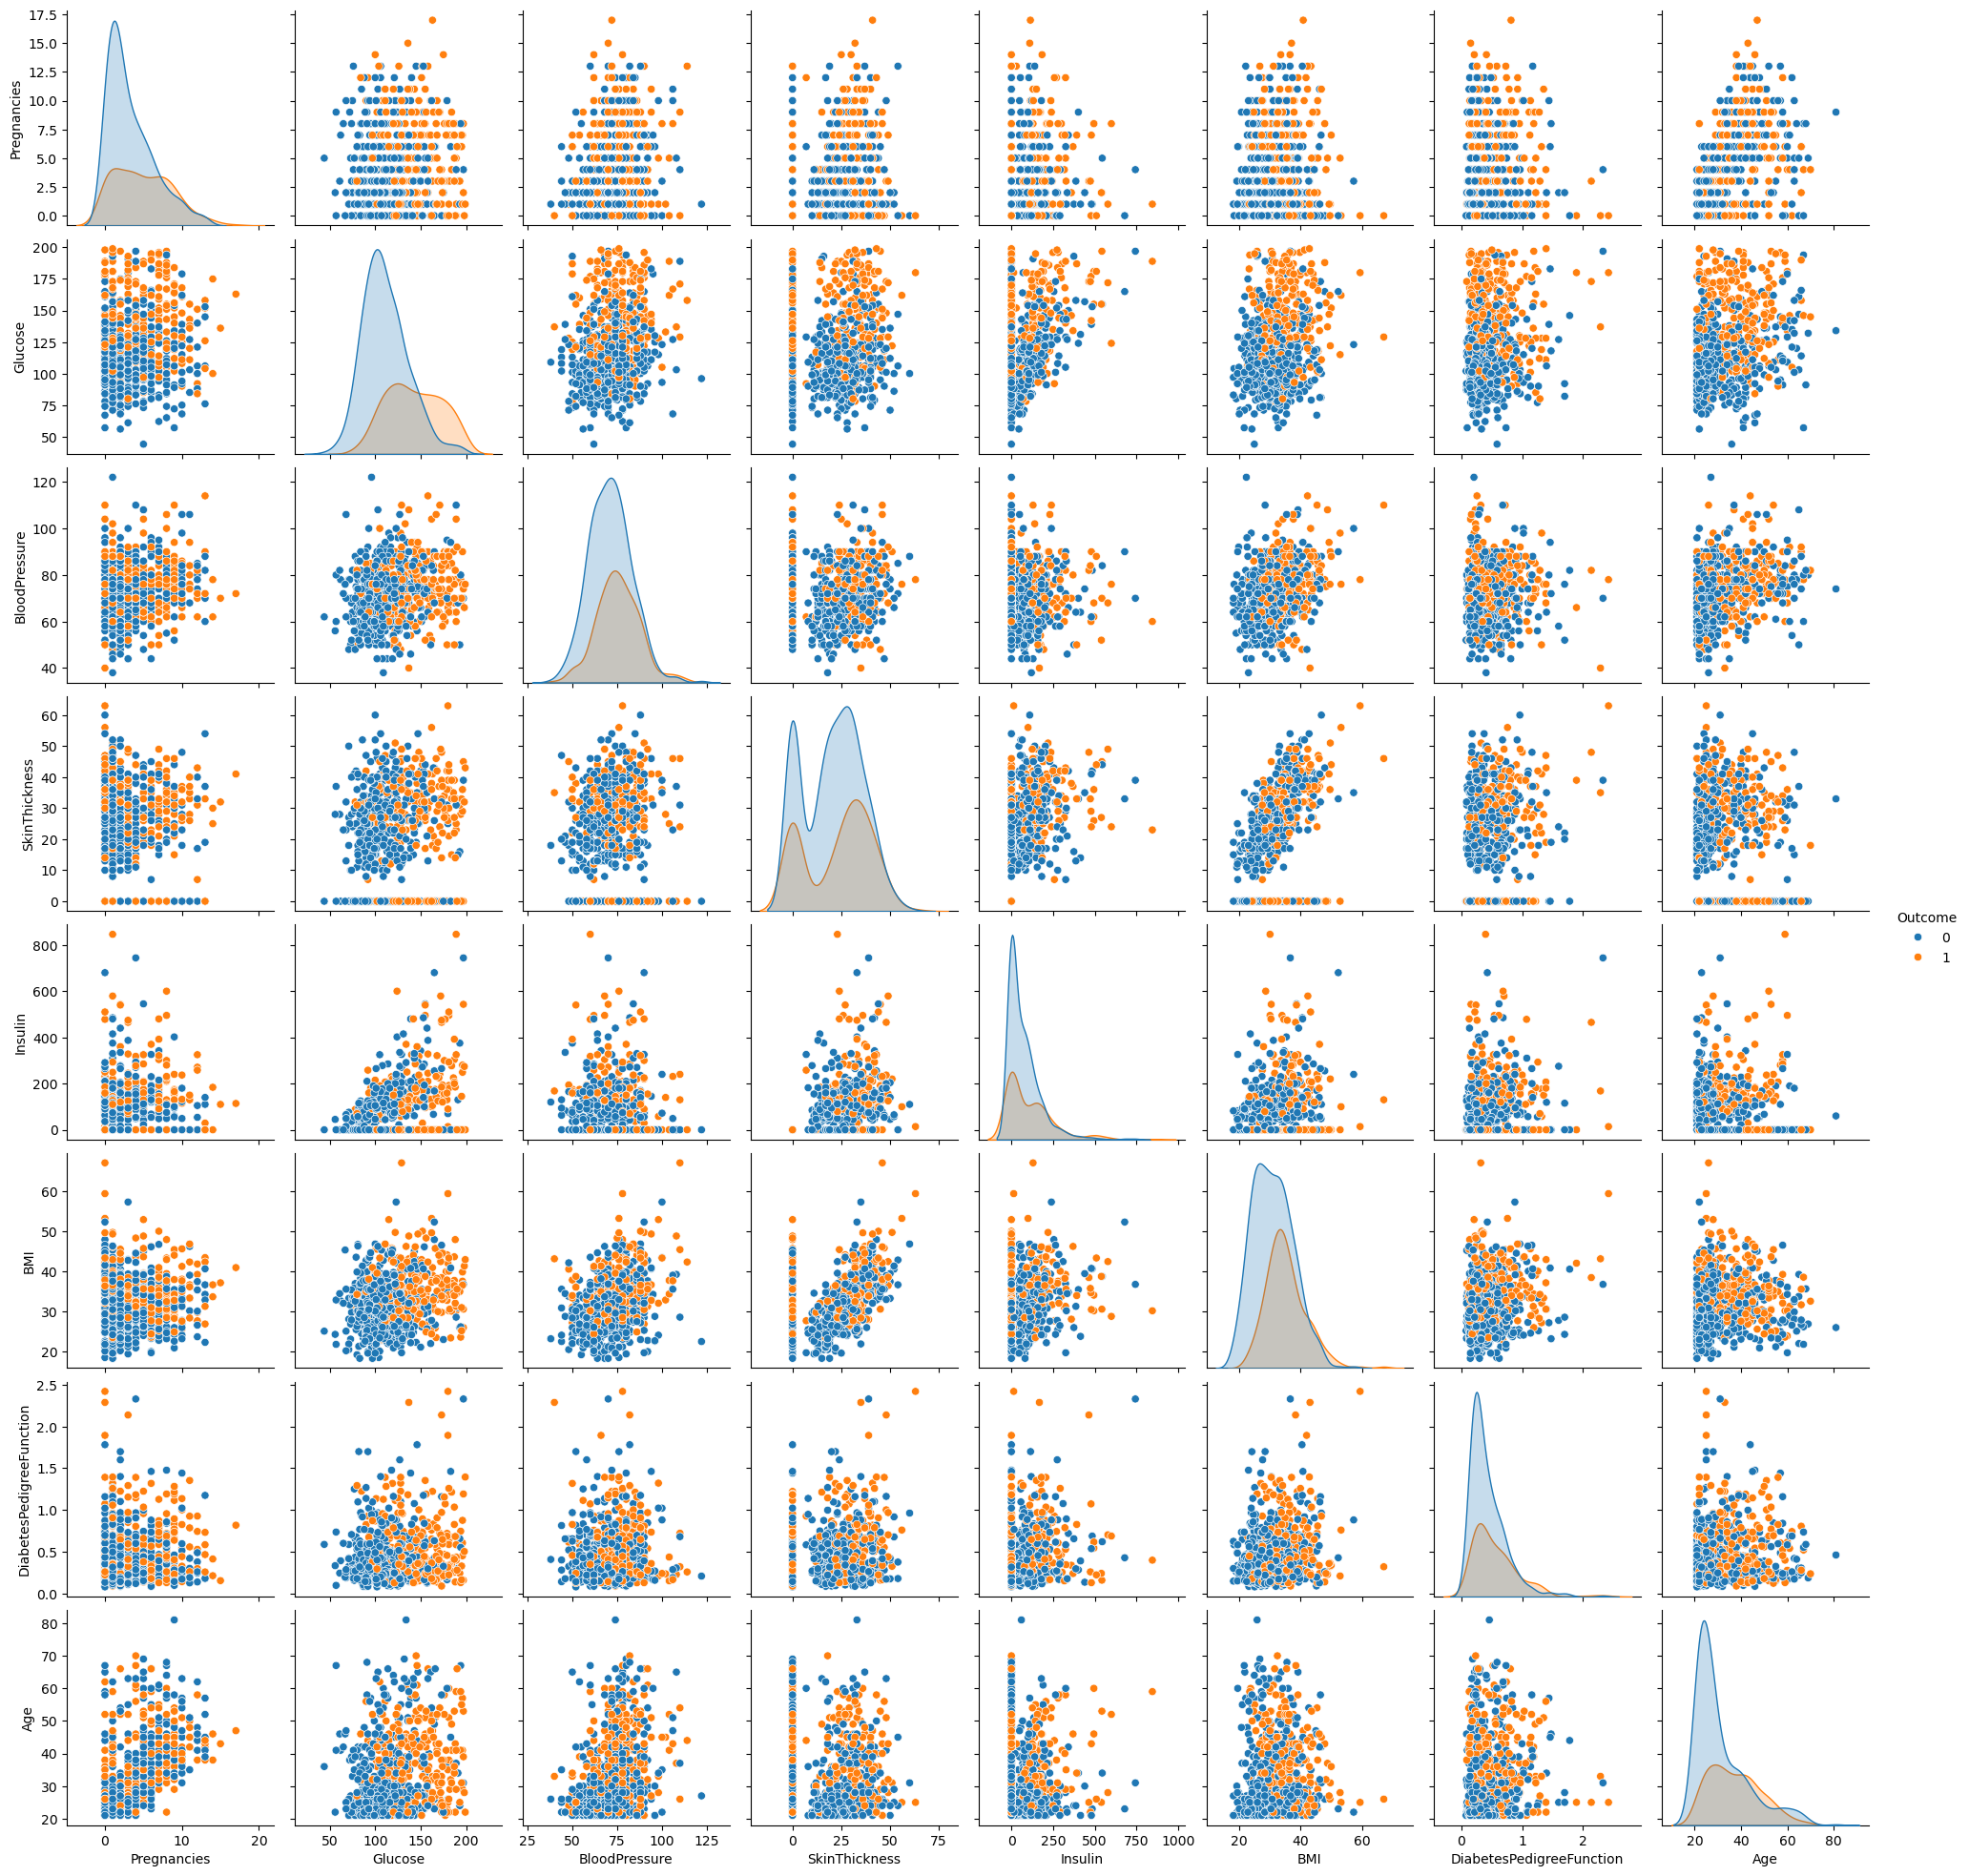

In [33]:
sns.pairplot(df, hue = "Outcome");

# Train | Test Split

In [35]:
X = df.drop("Outcome", axis=1)
y = df.Outcome

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# without stratify_y

X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.20, random_state=42)

print(y_train_.value_counts(normalize=True))
print()
print(y_test_.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Outcome
0    0.680556
1    0.319444
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# When separating classification data into train and test sets, if our data is inbalanced, we must use the stratify=y parameter. 
# Stratify parameter preserves the ratio of 0 and 1 classes to each other in both train and test data.

# If this parameter is not used in inbalanced data, the lesser class can be distributed unevenly in the train or test set. This naturally lowers the scores of the inbalanced class.

# Whether your data is balanced or inbalanced, you can use stratify=y in all of them.

In [ ]:
# proportion of each class in the target feature with stratify_y on training and test data

print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.65625
1    0.34375
Name: proportion, dtype: float64

Outcome
0    0.659722
1    0.340278
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


# Modelling

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# we install our pipeline.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [43]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[0.23367936, 0.76632064],
       [0.11960923, 0.88039077],
       [0.58160166, 0.41839834],
       [0.81462592, 0.18537408],
       [0.19181772, 0.80818228],
       [0.91051658, 0.08948342],
       [0.7639345 , 0.2360655 ],
       [0.13932957, 0.86067043],
       [0.97125901, 0.02874099],
       [0.88970007, 0.11029993],
       [0.71503222, 0.28496778],
       [0.75805504, 0.24194496],
       [0.82996045, 0.17003955],
       [0.81260234, 0.18739766],
       [0.0974634 , 0.9025366 ],
       [0.98344478, 0.01655522],
       [0.84875214, 0.15124786],
       [0.30126046, 0.69873954],
       [0.62398487, 0.37601513],
       [0.92736542, 0.07263458],
       [0.54071098, 0.45928902],
       [0.97778171, 0.02221829],
       [0.22511415, 0.77488585],
       [0.88700925, 0.11299075],
       [0.76148606, 0.23851394],
       [0.69324508, 0.30675492],
       [0.89994734, 0.10005266],
       [0.57209896, 0.42790104],
       [0.73984559, 0.26015441],
       [0.8399177 , 0.1600823 ],
       [0.

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1] # 1 probability of belonging to class
test_data.sample(10)

# adding pred and pred_proba featurettes to our test data 
# we observe again how the model performs the prediction process.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
102            0      125             96              0        0  22.5   
235            4      171             72              0        0  43.6   
537            0       57             60              0        0  21.7   
91             4      123             80             15      176  32.0   
605            1      124             60             32        0  35.8   
233            4      122             68              0        0  35.0   
205            5      111             72             28        0  23.9   
324            2      112             75             32        0  35.7   
176            6       85             78              0        0  31.2   
354            3       90             78              0        0  42.7   

     DiabetesPedigreeFunction  Age  Outcome  pred  pred_proba  
102                     0.262   21        0     0    0.063143  
235                     0.479   26        1     1    0.889092  
537                     0.735   67        0     0    0.016555  
91                      0.443   34        0     0    0.247383  
605                     0.514   21        0     0    0.348910  
233                     0.394   29        0     0    0.369007  
205                     0.407   27        0     0    0.131152  
324                     0.148   21        0     0    0.189872  
176                     0.382   42        0     0    0.117422  
354                     0.559   21        0     0    0.246984

In [46]:
test_data.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
720            4       83             86             19        0  29.3   
405            2      123             48             32      165  42.1   
352            3       61             82             28        0  34.4   
287            1      119             86             39      220  45.6   
433            2      139             75              0        0  25.6   
34            10      122             78             31        0  27.6   
231            6      134             80             37      370  46.2   
329            6      105             70             32       68  30.8   
526            1       97             64             19       82  18.2   
413            1      143             74             22       61  26.2   

     DiabetesPedigreeFunction  Age  Outcome  pred  pred_proba  
720                     0.317   34        0     0    0.060425  
405                     0.520   26        0     1    0.503913  
352                     0.243   46        0     0    0.041801  
287                     0.808   29        1     0    0.454437  
433                     0.167   29        0     0    0.198246  
34                      0.512   45        0     0    0.425908  
231                     0.238   46        1     1    0.630880  
329                     0.122   37        0     0    0.170040  
526                     0.299   21        0     0    0.024656  
413                     0.256   21        0     0    0.203409

## Model Performance on Classification Tasks

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

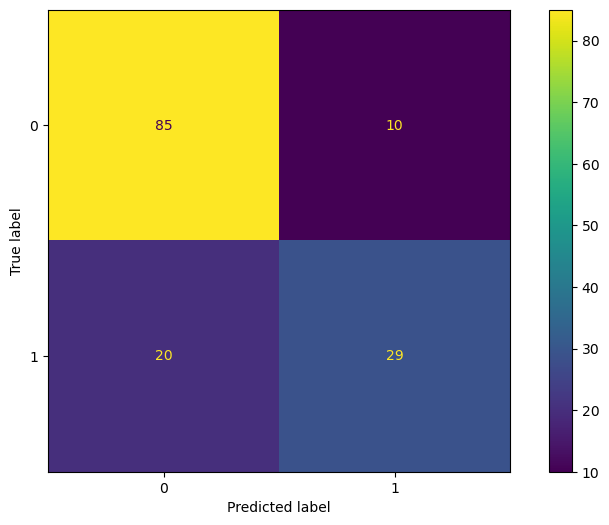

In [49]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)

In [50]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [51]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [115]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [ ]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10) # In each iteration, according to the ratio of train and test sets to each other, all 
                                  # decomposes in iterations.

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], # 1 sınıfının scorelarını max. eder.
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1   0.022986    0.055969        0.600000         0.718310     0.450000   
2   0.016990    0.042494        0.642857         0.744526     0.450000   
3   0.016992    0.024495        0.923077         0.717557     0.600000   
4   0.017989    0.014994        0.857143         0.716418     0.600000   
5   0.016999    0.035514        0.705882         0.727941     0.600000   
6   0.012993    0.020498        0.647059         0.727941     0.550000   
7   0.012992    0.018990        0.714286         0.723881     0.526316   
8   0.006996    0.015114        0.647059         0.719424     0.578947   
9   0.013993    0.015990        0.750000         0.698529     0.600000   
10  0.008995    0.017989        0.625000         0.729927     0.500000   

    train_recall   test_f1  train_f1  test_accuracy  train_accuracy  
1       0.573034  0.514286  0.637500       0.706897        0.776062  
2       0.573034  0.529412  0.647619       0.724138        0.785714  
3       0.528090  0.727273  0.608414       0.844828        0.766409  
4       0.539326  0.705882  0.615385       0.827586        0.768340  
5       0.556180  0.648649  0.630573       0.775862        0.776062  
6       0.556180  0.594595  0.630573       0.741379        0.776062  
7       0.541899  0.606061  0.619808       0.771930        0.770713  
8       0.558659  0.611111  0.628931       0.754386        0.772640  
9       0.533708  0.666667  0.605096       0.789474        0.761079  
10      0.561798  0.555556  0.634921       0.719298        0.778420

In [119]:
df_scores.mean()[2:]

test_precision     0.711236
train_precision    0.722445
test_recall        0.545526
train_recall       0.552191
test_f1            0.615949
train_f1           0.625882
test_accuracy      0.765578
train_accuracy     0.773150
dtype: float64

## Cross Validate for 0 class

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

# It is used to get other classes instead of Class 1 which is assigned by default with make_score.
# By using the pos_label =0 parameter in f1_score in make_scorer, we can change the class value and perform operations on other classes.
# the metrics we synchronize to make_scorer, we define them in a dictionary and assign them to a variable (scoring).

# no post_label in make_scorer, came from scor_func. (f1, recall etc.)   
#scoring = {“precision_0”:precision_0, “recall_0”:recall_0, “f1_0”:f1_0}, given in dict and written the same way as the merics keys above 

In [ ]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

# We can get the metric scores of class 0 by giving the scoring variable we defined above to the scoring parameter

fit_time  score_time  test_precision_0  train_precision_0  test_recall_0  \
1   0.023986    0.021988          0.744186           0.797872       0.842105   
2   0.028985    0.026983          0.750000           0.800525       0.868421   
3   0.016990    0.023987          0.822222           0.782946       0.973684   
4   0.025991    0.027533          0.818182           0.786458       0.947368   
5   0.011992    0.019990          0.804878           0.793194       0.868421   
6   0.016989    0.019990          0.780488           0.793194       0.842105   
7   0.013992    0.013993          0.790698           0.787013       0.894737   
8   0.015994    0.017988          0.800000           0.792105       0.842105   
9   0.008996    0.031980          0.804878           0.783290       0.891892   
10  0.009993    0.019989          0.756098           0.795812       0.837838   

    train_recall_0  test_f1_0  train_f1_0  
1         0.882353   0.790123    0.837989  
2         0.897059   0.804878    0.846047  
3         0.891176   0.891566    0.833563  
4         0.888235   0.878049    0.834254  
5         0.891176   0.835443    0.839335  
6         0.891176   0.810127    0.839335  
7         0.891176   0.839506    0.835862  
8         0.885294   0.820513    0.836111  
9         0.879765   0.846154    0.828729  
10        0.891496   0.794872    0.840941

In [125]:
df_scores.mean()[2:]

test_precision_0     0.787163
train_precision_0    0.791241
test_recall_0        0.880868
train_recall_0       0.888891
test_f1_0            0.831123
train_f1_0           0.837217
dtype: float64

## GridSearchCV

[Logistic Regression Hyperparametreleri](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
pipe_model.get_params()

# In gridsearchCV, if we are going to use the pipeline model, the ML algorithm defined in the pipeline
# We can see the list of hyper_parameters with get_params().

# We should write the hyper_parameters that we will write inside the param_grid parameter of gridsearchCv as follows.

# If you notice, after the name “logistic” that we give to the ML model in the pipeline, there are 2 underscores (__) and then
# Notice that the ML model has its own hyper parameter name.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'deprecated',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [129]:
pipe_model.set_params(logistic__C = 0.5)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=0.5))])

In [131]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(C=0.5))],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(C=0.5),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 0.5,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'deprecated',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [135]:
from sklearn.model_selection import GridSearchCV

In [ ]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) # Suggested to take logspace for the coefficient and give values
class_weight= ["balanced", None] # will fix if there is unbalance

# We can use class_weight= “balanced” to balance classes in unbalanced data sets. 
# When the data is balanced, the model tries to increase the precision score of the less frequent class to increase the recall score of that class.

# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"] # By default lbfgs is not changed much. we have given to see them all 

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = StratifiedKFold(n_splits = 10) #shuffle = True, random_state = 42

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   # Default olarak 1 sınıfının scorunu max. eder. 0 sınıfınınkini max. etmek isterseniz f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1,
                          return_train_score=True)

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [139]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [143]:
grid_model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [145]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

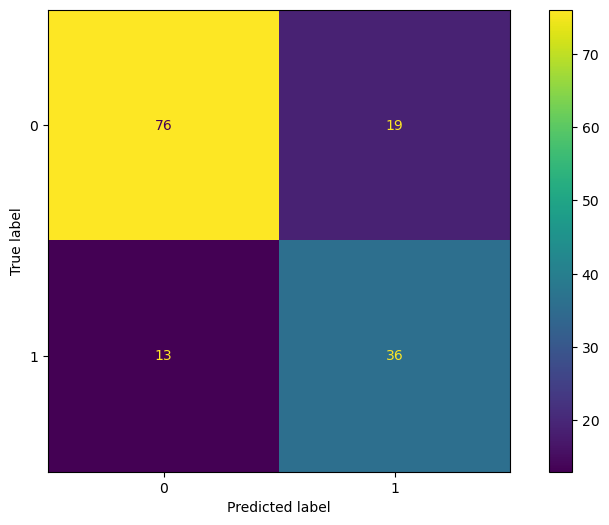

In [147]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

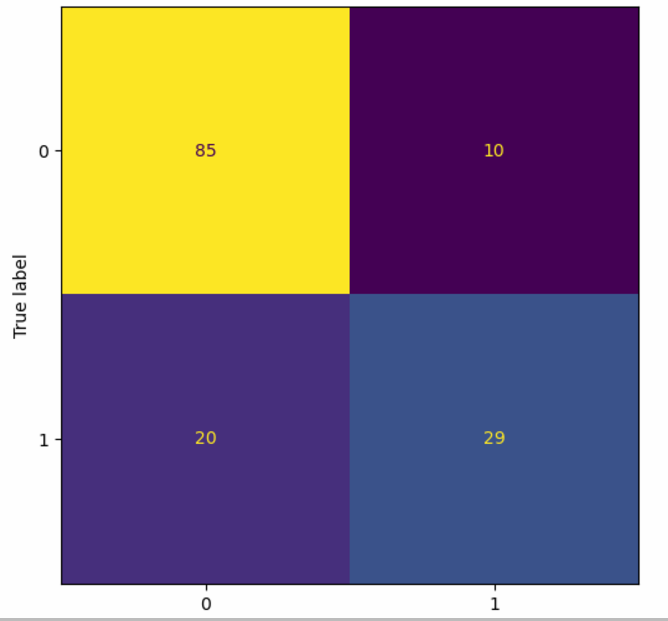

In [150]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

[Threshold Optimization](https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7el)

In [152]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

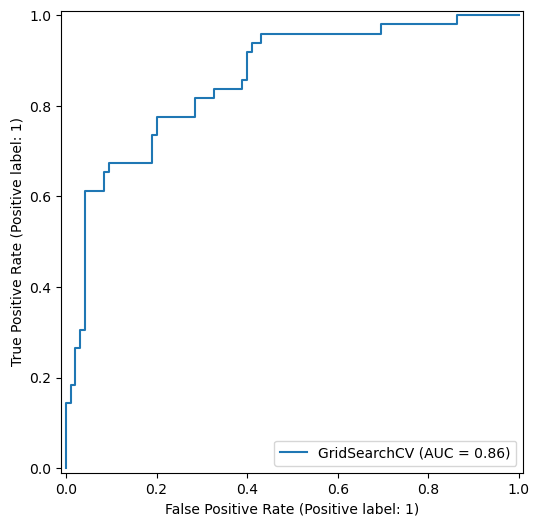

In [154]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

## Precision Recall Curve

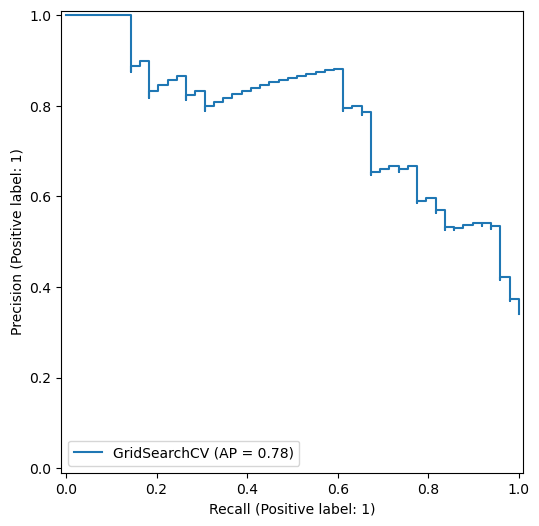

In [156]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

# Finding Best Thresholds

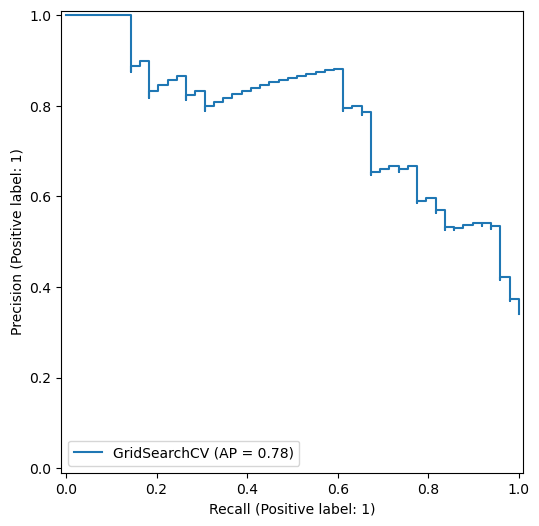

In [158]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

In [ ]:
y_train_pred_proba = grid_model.predict_proba(X_train) # We determine the treshold over the train data.
average_precision_score(y_train, y_train_pred_proba[:,1])

0.7039749907641873

In [162]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

In [164]:
print("precision :", len(precisions))
print("recall    :", len(recalls))
print("threshold :", len(thresholds)) 

precision : 577
recall    : 577
threshold : 576


In [ ]:
dict = {"precisions":precisions[:-1], "recalls":recalls[:-1], "threshold":thresholds}
df_metric = pd.DataFrame(dict).sort_values(by = ["recalls", "precisions"], ascending=False)
df_metric

# precision and recall values are 1 less than threshold, so we ignore the last values of precision and recall.
# We sort the df_metric scores first by recall and then by precision.
# This sorting also returns the highest precision score that corresponds to our target recall score.
# Remember that our goal is always to achieve max recall score with max precision score.

precisions   recalls  threshold
115    0.429501  1.000000   0.224454
114    0.428571  1.000000   0.222732
113    0.427646  1.000000   0.221428
112    0.426724  1.000000   0.217899
111    0.425806  1.000000   0.216208
..          ...       ...        ...
571    0.600000  0.015152   0.963333
573    0.666667  0.010101   0.969829
572    0.500000  0.010101   0.964119
575    1.000000  0.005051   0.988414
574    0.500000  0.005051   0.977212

[576 rows x 3 columns]

In [168]:
df_metric[:1]

precisions  recalls  threshold
115    0.429501      1.0   0.224454

In [170]:
optimal_threshold = 0.224454

In [172]:
class_1_proba = grid_model.predict_proba(X_test)[:, 1]
class_1_proba

array([0.8611492 , 0.91896054, 0.54016703, 0.32834925, 0.84585748,
       0.19021336, 0.37230057, 0.89304806, 0.09180042, 0.23759615,
       0.42219785, 0.40049758, 0.32151483, 0.29623383, 0.91146829,
       0.04580629, 0.31485233, 0.77838554, 0.60682562, 0.17502523,
       0.59125055, 0.07183644, 0.85620113, 0.26773524, 0.35899706,
       0.42664734, 0.21361333, 0.5400869 , 0.47726102, 0.26626972,
       0.32221102, 0.47417581, 0.59971082, 0.29606174, 0.92992876,
       0.16407425, 0.56703307, 0.3750529 , 0.66448361, 0.17883548,
       0.22571604, 0.10909775, 0.11562814, 0.76816538, 0.45676856,
       0.48417606, 0.45123546, 0.84199949, 0.89861798, 0.48443266,
       0.31846051, 0.22799051, 0.45359941, 0.06128434, 0.08594211,
       0.87896895, 0.65057608, 0.21427774, 0.72028682, 0.53912112,
       0.81872486, 0.62132934, 0.76003111, 0.91815369, 0.84383514,
       0.17312347, 0.33793956, 0.36856044, 0.96338715, 0.10318132,
       0.50367611, 0.22025037, 0.76703886, 0.2414956 , 0.65057

In [174]:
y_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba]

In [180]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[29 66]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.97      0.31      0.46        95
           1       0.42      0.98      0.59        49

    accuracy                           0.53       144
   macro avg       0.69      0.64      0.53       144
weighted avg       0.78      0.53      0.51       144



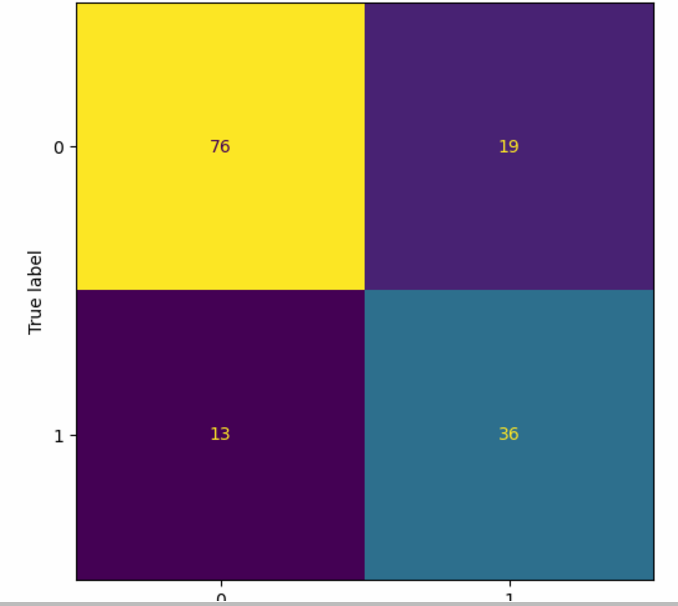

In [ ]:
class_1_proba_train = grid_model.predict_proba(X_train)[:,1]

y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba_train]

print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

# we do the same process for the train set.

[[115 263]
 [  1 197]]
              precision    recall  f1-score   support

           0       0.99      0.30      0.47       378
           1       0.43      0.99      0.60       198

    accuracy                           0.54       576
   macro avg       0.71      0.65      0.53       576
weighted avg       0.80      0.54      0.51       576



In [ ]:
# Cross validation with optimal treshold

from sklearn.model_selection import StratifiedKFold

def CV(n, model, X, y, optimal_threshold=0.224456):
    skf = StratifiedKFold(n_splits = n) #shuffle = True, random_state = 42
    
    acc_scores = []
    test_pre_scores = []
    test_rec_scores = []
    test_f1_scores  = []
    
    train_pre_scores = []
    train_rec_scores = []
    train_f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        model = model
        model.fit(X_train, y_train)
        
        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred2 = [1 if i >= optimal_threshold else 0 for i in y_pred_proba]
        
        
        y_train_pred_proba = model.predict_proba(X_train)[:,1]
        y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in y_train_pred_proba]
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        
        test_pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        test_rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        test_f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
        
        train_pre_scores.append(precision_score(y_train, y_train_pred2, pos_label=1))
        train_rec_scores.append(recall_score(y_train, y_train_pred2, pos_label=1))
        train_f1_scores.append(f1_score(y_train, y_train_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>15,.2f}%  std {np.std(acc_scores)*100:.2f}%\n')
    
    print(f'Test_Precision-1 {np.mean(test_pre_scores)*100:>7,.2f}%  std {np.std(test_pre_scores)*100:.2f}%')
    print(f'Train_Precision-1 {np.mean(train_pre_scores)*100:>6,.2f}%  std {np.std(train_pre_scores)*100:.2f}%\n')
    
    print(f'Test_Recall-1 {np.mean(test_rec_scores)*100:>10,.2f}%  std {np.std(test_rec_scores)*100:.2f}%')
    print(f'Train_Recall-1 {np.mean(train_rec_scores)*100:>9,.2f}%  std {np.std(train_rec_scores)*100:.2f}%\n')
    
    print(f'Test_F1_score-1 {np.mean(test_f1_scores)*100:>8,.2f}%  std {np.std(test_f1_scores)*100:.2f}%')
    print(f'Train_F1_score-1 {np.mean(train_f1_scores)*100:>7,.2f}%  std {np.std(train_f1_scores)*100:.2f}%')
    
# We cannot use the classic Cross validation function for optimal threshold. So here we use the code we wrote manually. 
# The reason we look at the standard deviation of the scores along with the scores is to see how similar the scores are to each other 

In [187]:
model = LogisticRegression(C=0.1, class_weight='balanced',penalty='l1', solver='liblinear')
CV(10, model, X_train, y_train)

Accuracy           41.13%  std 2.89%

Test_Precision-1   36.52%  std 1.55%
Train_Precision-1  36.77%  std 0.49%

Test_Recall-1      96.47%  std 4.51%
Train_Recall-1     97.03%  std 0.26%

Test_F1_score-1    52.97%  std 2.12%
Train_F1_score-1   53.33%  std 0.53%


# Final Model and Model Deployment

In [ ]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=0.1, class_weight='balanced',
                                                         penalty='l1', solver='liblinear'))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

# we build the final model with the best hyper parameters we find.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [191]:
import pickle

In [193]:
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [197]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [ ]:
my_dict = {"Pregnancies": [3, 4, 5],
           "Glucose": [100, 110, 120],
           "BloodPressure": [75, 80, 70],
           "SkinThickness": [30, 25, 20],
           "Insulin": [80, 120, 130],
           "BMI": [25, 35, 30],
           "DiabetesPedigreeFunction": [0.4, 0.5, 0.6],
           "Age": [30, 40, 35]
          }

# We determine 3 observations according to min, max values.

In [201]:
sample = pd.DataFrame(my_dict)
sample

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            3      100             75             30       80   25   
1            4      110             80             25      120   35   
2            5      120             70             20      130   30   

   DiabetesPedigreeFunction  Age  
0                       0.4   30  
1                       0.5   40  
2                       0.6   35

In [203]:
sample_2 = sample.copy()

In [205]:
new_model.predict(sample)

array([0, 0, 0], dtype=int64)

## New Predictions for optimal_threshols

In [207]:
def predict(model, X_test, optimal_threshold = 0.224456):
    
    predict_proba = model.predict_proba(X_test)
    
    prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba[:,1]]
    
    return prediction

In [209]:
y_pred = predict(final_model, sample_2)
y_pred

[0, 1, 1]

In [211]:
predictions = new_model.predict(sample)
predictions_proba = new_model.predict_proba(sample)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [ ]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.22"] = predictions2
sample

# Below we can observe the predictions we get according to the default 0.5 threshold and optimal threshold.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            3      100             75             30       80   25   
1            4      110             80             25      120   35   
2            5      120             70             20      130   30   

   DiabetesPedigreeFunction  Age  pred_proba  pred_0.50  pred_0.22  
0                       0.4   30    0.173912          0          0  
1                       0.5   40    0.444480          0          1  
2                       0.6   35    0.462021          0          1

# <p style="background-color:orange;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:10px 10px;"><b>Thank you!</b></p>